<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto de Parceria** |
Aluno: [Lucas Silva Gonçalves](www.linkedin.com/in/lucas-analista-de-dados)

---

# **Tópicos**

<ol type="1">
  <li>Coleta de Dados;</li>
  <li>Modelagem;</li>
  <li>Conclusões.</li>
</ol>

## Coleta de Dados

### **Contexto**

Neste projeto, realizaremos uma análise para determinar a classificação de influenciadores no TikTok. Utilizaremos métricas como número de seguidores, visualizações e curtidas para estabelecer as posições no ranking. Para isso, empregaremos o conjunto de dados disponível no Kaggle [Top 1000 TikTok Influencers Ranking](https://www.kaggle.com/datasets/princeiornongu/merged-cc/data), para poder determina a posição.

In [99]:
!wget -q "https://raw.githubusercontent.com/LucasSG94/Projeto-Ebac-Modulo25/main/tiktok%20top%201000.csv" -O tiktoktop.csv

### **Manipulação dos Dados**

In [98]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

Para começar, é necessário tratar os dados no arquivo original, que está no formato `.csv`.

In [116]:
# Conversão do arquivo de .csv para DataFrame

tiktok_df = pd.read_csv('tiktoktop.csv')
tiktok_df.head()

,Country,Rank,Account,Title,Link,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.,Scraped
0,All,1,billieeilish,BILLIE EILISH,https://www.tiktok.com/@billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0,2022-02-07 16:54:35.641971
1,All,2,badbunny,Bad Bunny,https://www.tiktok.com/@badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0,2022-02-07 16:54:35.641971
2,All,3,chipmunksoftiktok,Chipmunks of TikTok,https://www.tiktok.com/@chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0,2022-02-07 16:54:35.641971
3,All,4,charlidamelio,charli d’amelio,https://www.tiktok.com/@charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0,2022-02-07 16:54:35.641971
4,All,5,yessicadcs,Yessica y Moises 🦜,https://www.tiktok.com/@yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0,2022-02-07 16:54:35.641971


In [101]:
# Remoção das colunas que não são o foco do projeto

tiktok_df.drop(['Country', 'Account', 'Title', 'Link', 'Scraped', 'Comments avg.', 'Shares avg.'], axis=1, inplace=True)
tiktok_df.head()

,Rank,Subscribers count,Views avg.,Likes avg.
0,1,41600000.0,95000000.0,18100000.0
1,2,13400000.0,33300000.0,7300000.0
2,3,11400000.0,25000000.0,3000000.0
3,4,135400000.0,18700000.0,2600000.0
4,5,263700.0,16700000.0,1400000.0


In [102]:
tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               1000 non-null   int64  
 1   Subscribers count  1000 non-null   float64
 2   Views avg.         1000 non-null   float64
 3   Likes avg.         1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


### **Visualização**

Para se ter uma ideia da distribuição dos dados, o numero de inscritos será comparados, em um gráfico, com a Posição que se encontra no rank até 2022.

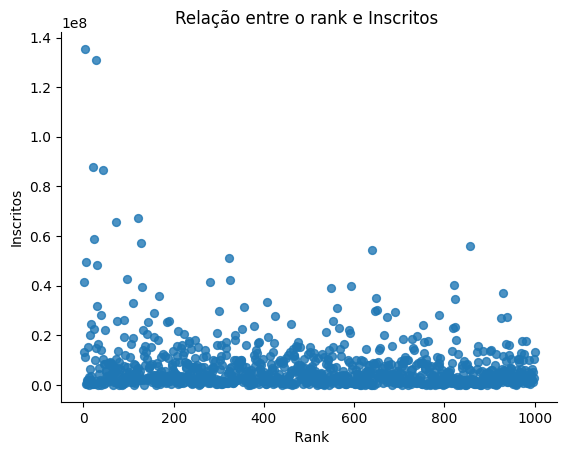

In [126]:
from matplotlib import pyplot as plt
grafico = tiktok_df.plot(kind='scatter', x='Rank', y='Subscribers count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
grafico.set(title='Relação entre o rank e Inscritos ', xlabel=' Rank', ylabel='Inscritos');

Podemos observar no grafico que a quantidades de inscritos pouco influencia a posição do rank. sendo que a gandre maioria esta concentrada entre 0 e 200 mil inscritos em seus canais e soemnte duas contas tem mais de 1 milhão de inscritos.

### **Modelagem**

#### **Variáveis Numéricas**

Para um melhor Machine Learning, é necessário trabalhar com os dados em escalas reduzidas. <br>
Para isso, é necessário aplicar o método de padronização ($x' = \frac{x - x_{m}}{\sigma}$).

In [103]:
# Padronização do Rank

media_tiktok = tiktok_df['Rank'].mean()
print(media_tiktok)
desvio_padrao_tiktok = tiktok_df['Rank'].std()
print(desvio_padrao_tiktok)

tiktok_df['Rank - std'] = tiktok_df['Rank'].apply(lambda tiktok: (tiktok - media_tiktok) / desvio_padrao_tiktok)
tiktok_df.head()


500.5
288.8194360957494


,Rank,Subscribers count,Views avg.,Likes avg.,Rank - std
0,1,41600000.0,95000000.0,18100000.0,-1.729454
1,2,13400000.0,33300000.0,7300000.0,-1.725992
2,3,11400000.0,25000000.0,3000000.0,-1.722530
3,4,135400000.0,18700000.0,2600000.0,-1.719067
4,5,263700.0,16700000.0,1400000.0,-1.715605


In [104]:
# Padronização das demais colunas

subscribers_mean = tiktok_df['Subscribers count'].mean()
views_mean = tiktok_df['Views avg.'].mean()
likes_mean = tiktok_df['Likes avg.'].mean()

subscribers_std = tiktok_df['Subscribers count'].std()
views_std = tiktok_df['Views avg.'].std()
likes_std = tiktok_df['Likes avg.'].std()

tiktok_df['Subscribers count - std'] = tiktok_df['Subscribers count'].apply(lambda x: (x - subscribers_mean) / subscribers_std)
tiktok_df['Views avg - std'] = tiktok_df['Views avg.'].apply(lambda x: (x - views_mean) / views_std)
tiktok_df['Likes avg - std'] = tiktok_df['Likes avg.'].apply(lambda x: (x - likes_mean) / likes_std)

tiktok_df.head()

,Rank,Subscribers count,Views avg.,Likes avg.,Rank - std,Subscribers count - std,Views avg - std,Likes avg - std
0,1,41600000.0,95000000.0,18100000.0,-1.729454,3.177769,19.437077,25.336494
1,2,13400000.0,33300000.0,7300000.0,-1.725992,0.584110,6.301491,9.829857
2,3,11400000.0,25000000.0,3000000.0,-1.722530,0.400162,4.534467,3.655918
3,4,135400000.0,18700000.0,2600000.0,-1.719067,11.804905,3.193232,3.081598
4,5,263700.0,16700000.0,1400000.0,-1.715605,-0.624085,2.767443,1.358639


In [105]:
tiktok_df.drop(['Rank', 'Subscribers count', 'Views avg.', 'Likes avg.'], axis=1, inplace=True)
tiktok_df.head()

,Rank - std,Subscribers count - std,Views avg - std,Likes avg - std
0,-1.729454,3.177769,19.437077,25.336494
1,-1.725992,0.584110,6.301491,9.829857
2,-1.722530,0.400162,4.534467,3.655918
3,-1.719067,11.804905,3.193232,3.081598
4,-1.715605,-0.624085,2.767443,1.358639


### **Treino / Teste**

Para criar um modelo de aprendizagem de máquina funcional, é necessário separar a base de dados em dois conjuntos, um maior e outro menor. O maior será usado para treinar o modelo e o menor será usado para testá-lo.

In [106]:
# Separação da base de dados em 75% (treino) e 25% (teste)

from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(
    tiktok_df.drop(['Rank - std'], axis=1),
    tiktok_df['Rank - std'],
    test_size=0.25,
    random_state=123
)

print(f'predictors_train.shape = {predictors_train.shape}')
print(f'predictors_test.shape = {predictors_test.shape}')
print(f'target_train.shape = {target_train.shape}')
print(f'target_test.shape = {target_test.shape}')

predictors_train.shape = (750, 3)
predictors_test.shape = (250, 3)
target_train.shape = (750,)
target_test.shape = (250,)


#### **Treino**

O treino serve para calcular os coeficiente, tanto linear quanto angular, da fórmula matemática que será usada no modelo de machine learning.

In [107]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model = model.fit(predictors_train, target_train)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Subscribers count - std', 'Views avg - std', 'Likes avg - std'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.07524199, -0.26478934, -0.10171397]),
 'rank_': 3,
 'singular_': array([41.49873111, 26.75183323, 13.50721413]),
 'intercept_': -0.004872957088090412}

In [108]:
# Coeficiente angular

a = model.coef_
print(a)

[-0.07524199 -0.26478934 -0.10171397]


In [109]:
# Coeficiente linear

b = model.intercept_
print(b)

-0.004872957088090412


## Conclusões

#### **Avaliação**

 da margem de erro da predição do modelo.

In [110]:
# Cálculo do RMSE (root mean square error)
from sklearn.metrics import mean_squared_error

y_pred = model.predict(predictors_test)
mse = mean_squared_error(target_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.917361229264959


### **Predição**

Com o modelo já treinado, podemos inserir os dados referentes ao número de seguidores, visualizações e curtidas para calcular a posição do influenciador no ranking.

In [111]:
num_inscritos = float(input("Qual o número de inscritos? "))
num_views = float(input("Qual o número de visualizações? "))
num_likes = float(input("Qual o número de curtidas? "))

Qual o número de inscritos? 200000
Qual o número de visualizações? 100000
Qual o número de curtidas? 2350000


In [112]:
# Padronizar os valores

numero_inscritos_std = (num_inscritos - subscribers_mean) / subscribers_std
numero_views_std = (num_views - views_mean) / views_std
numero_likes_std = (num_likes - likes_mean) / likes_std

In [113]:
# Criação de um array com dados para fazer a predição

canal_novo = np.array([numero_inscritos_std, numero_views_std, numero_likes_std])
print(canal_novo)

[-0.62994376 -0.76660439  2.72264851]


In [114]:
# Resultado do rank do influenciador

canal_novo_padrão = model.predict(canal_novo.reshape(1, -1))
print(canal_novo_padrão)

[-0.03141745]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [115]:
# Rank do IDH do influenciador sem estar padronizado

rank_canal_novo = canal_novo_padrão * desvio_padrao_tiktok + media_tiktok
print(rank_canal_novo)

[491.42602973]


In [130]:
print(f'\n O influenciador que teve as seguintes vizualizações:{num_views}, nº de inscritos: {num_inscritos} e numero de curtidas: {num_likes}\n Ficará na posição {rank_canal_novo}')


 O influenciador que teve as seguintes vizualizações:100000.0, nº de inscritos: 200000.0 e numero de curtidas: 2350000.0
 Ficará na posição [491.42602973]


**Considerações finais:**

Utilizando este modelo, é possível prever a futura posição de um influenciador no ranking ao atingir os números desejados de seguidores, visualizações e curtidas, permitindo-lhe compreender melhor seu crescimento na plataforma.